In [2]:
from pathlib import Path

import polars as pl
from atollgen_cli.runner import DataHolder
from entrez_fetcher.genome_store import GenomeStore
from matplotlib import pyplot as plt
from scibelt.aggregates import Dataset, aggregate_format, format_data
from scibelt.viz import (
    FigureSaver,
    get_legend_hl,
    seqlen_plot,
    propbarplot,
    alias_or_name,
    latex_size,
)
import numpy as np
import pandas as pd


In [3]:
data_holder = DataHolder(Path("../data/interim/"), ensure_data=False)
adb_path = data_holder.db_dir / "adb"
adb_sources_dir = data_holder.db_dir / "sources"
genome_store_dir = data_holder.db_dir / "genomes"
genome_store = GenomeStore(genome_store_dir)

ds = Dataset.from_folder(
    "../data/post-process/base_nooverlaps/", genome_store=genome_store
)

fs = FigureSaver("../figures/main/fig03/")

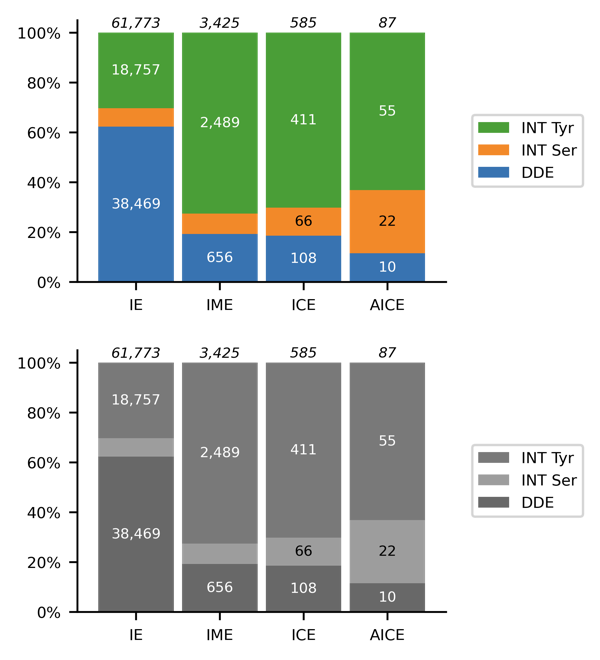

In [4]:
no_psi = pl.col("label") != "psiICE"
no_uGI = pl.col("label") != "uGI"
integrase_by_label = aggregate_format(
    ds.closest_int_categ_by_label.filter(no_psi & no_uGI),
    index="label",
    columns="integrase",
)
colors = {
    info.get("alias", name): info["color"]
    for name, info in format_data["integrase"].items()
}
with latex_size(double=True, width_prop=0.4, height=2):
    fig, ax = plt.subplots()
    propbarplot(integrase_by_label.to_pandas().set_index("label"), color=colors, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(
        *get_legend_hl(ax), ncol=1, loc="center left", bbox_to_anchor=(1.05, 0.5)
    )
    ax.set_yticks(np.arange(0, 1.01, 0.2))
    ax.grid(False)
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
fs.savefig(fig, "panel_A")


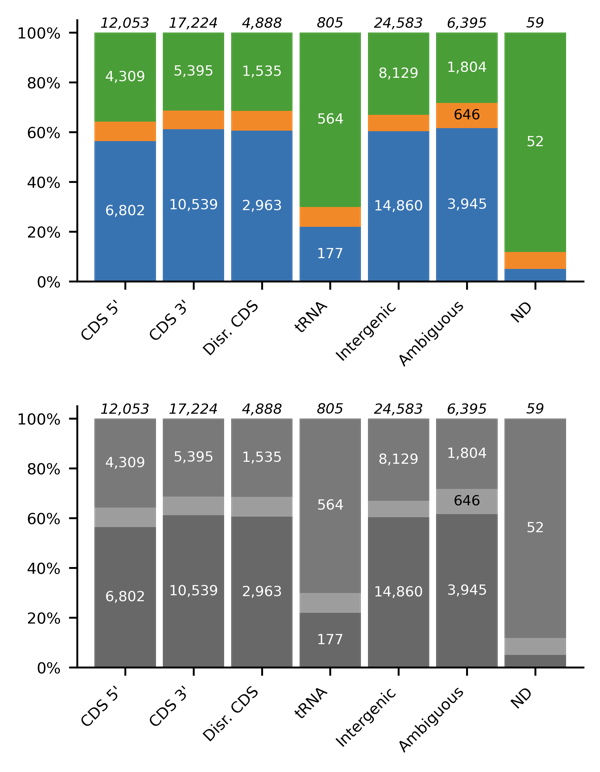

In [5]:
closest_int_categ_by_integ_site = aggregate_format(
    ds.closest_int_categ_by_integ_site,
    index="integ_site",
    columns="integrase",
)
colors = {
    info.get("alias", name): info["color"]
    for name, info in format_data["integrase"].items()
}
with latex_size(double=True, width_prop=0.55, height=2):
    fig, ax = plt.subplots()
    propbarplot(
        closest_int_categ_by_integ_site.to_pandas().set_index("integ_site"),
        ax=ax,
        legend=False,
        kind="bar",
        color=colors,
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.grid(False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_yticks(np.arange(0, 1.01, 0.2))
    ax.set_xlabel("")
fs.savefig(fig, "panel_B")


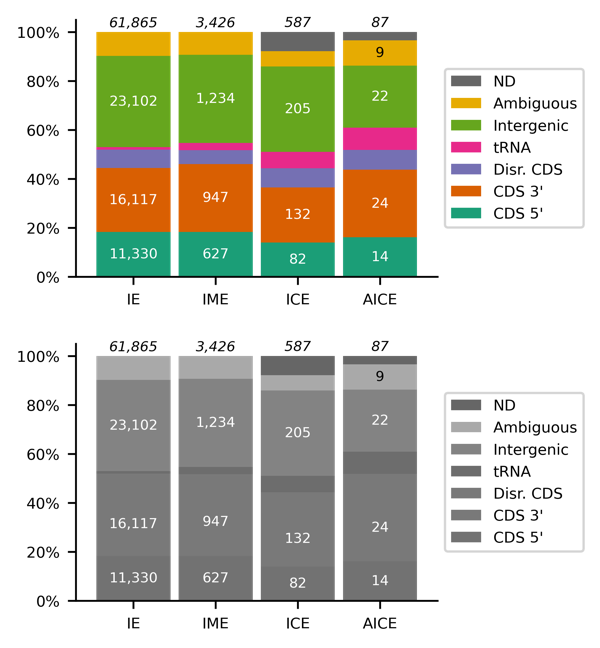

In [6]:
no_psi = pl.col("label") != "psiICE"
no_uGI = pl.col("label") != "uGI"

integ_site_by_label = aggregate_format(
    ds.integ_site_by_label.filter(no_psi & no_uGI),
    index="label",
    columns="integ_site",
)
colors = {
    info.get("alias", name): info["color"]
    for name, info in format_data["integ_site"].items()
}

with latex_size(double=True, width_prop=0.4, height=2):
    fig, ax = plt.subplots()
    propbarplot(
        integ_site_by_label.to_pandas().set_index("label"),
        ax=ax,
        legend=False,
        kind="bar",
        color=colors,
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
    ax.legend(*get_legend_hl(ax), ncol=1, loc="center left", bbox_to_anchor=(1.0, 0.5))
    ax.set_yticks(np.arange(0, 1.01, 0.2))
    ax.grid(False)
    ax.set_xlabel("")
fs.savefig(fig, "panel_C")